# Imports

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
pd.set_option('display.max_columns', None)

# First exploration

In [3]:
users_anime_df = pd.read_csv('../raw_data/animelist.csv')


In [14]:
anime_df = pd.read_csv('../raw_data/anime.csv')
#watching_status_df = pd.read_csv('../raw_data/watching_status.csv')
#rating_complete_df = pd.read_csv('../raw_data/rating_complete.csv')
#anime_df_relevant_PG = pd.read_csv('../raw_data/anime_df_relevant_PG.csv')

In [15]:
anime_df.shape

(17562, 35)

In [16]:
anime_df.columns


Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [87]:
users_anime_df.shape

(109224747, 5)

In [18]:
users_anime_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


# Prepare full data set for visualization

In [88]:
anime_df.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)

In [89]:
anime_df.head(2)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [90]:
users_anime_df.head(2)

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4


In [91]:
# take a fraction of full 100M lines
users_anime_sample = users_anime_df.sample(frac=0.0005, random_state=42)

In [92]:
users_anime_sample.shape

(54612, 5)

In [128]:
#merge anime_df with user_amine_sample
full_df_sample = anime_df.merge(users_anime_sample, on="anime_id", how='inner')

In [129]:
full_df_sample.shape

(54612, 39)

In [130]:
full_df_sample.head(2)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,user_id,rating,watching_status,watched_episodes
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,11550,8,2,26
1,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,44542,0,2,26


# Visualization


In [131]:
#color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

## anime_df

In [16]:
anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [17]:
anime_df.dtypes

MAL_ID            int64
Name             object
Score            object
Genres           object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

### Correlation

In [10]:
#correlation matrix
anime_df.corr()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
MAL_ID,1.000000,0.355529,-0.049188,-0.042297,0.023305,-0.056154,-0.068658,-0.031585,-0.039359
Popularity,0.355529,1.000000,-0.418699,-0.185933,-0.245257,-0.373770,-0.338071,-0.363674,-0.497297
Members,-0.049188,-0.418699,1.000000,0.778583,0.617074,0.976723,0.793760,0.758595,0.871980
Favorites,-0.042297,-0.185933,0.778583,1.000000,0.607484,0.749235,0.739112,0.588051,0.625559
Watching,0.023305,-0.245257,0.617074,0.607484,1.000000,0.477639,0.737078,0.657783,0.568709
Completed,-0.056154,-0.373770,0.976723,0.749235,0.477639,1.000000,0.685647,0.669724,0.779772
On-Hold,-0.068658,-0.338071,0.793760,0.739112,0.737078,0.685647,1.000000,0.896418,0.763963
Dropped,-0.031585,-0.363674,0.758595,0.588051,0.657783,0.669724,0.896418,1.000000,0.684445
Plan to Watch,-0.039359,-0.497297,0.871980,0.625559,0.568709,0.779772,0.763963,0.684445,1.000000


<AxesSubplot:>

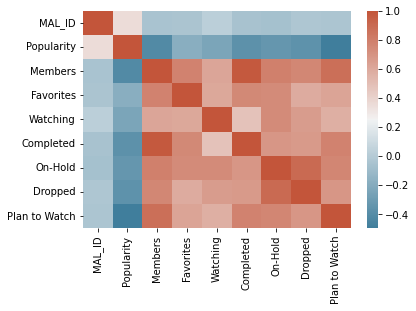

In [22]:
#correlation only on numerical values
fig, ax = plt.subplots(figsize=(6,4))    

sns.heatmap(anime_df.corr(),ax=ax,cmap=cmap)

In [23]:
#encode string values to be able to build corr matrix
encoded_anime_df = anime_df
for i in encoded_anime_df.columns:
    encoded_anime_df[i] = encoded_anime_df[i].astype('category').cat.codes


In [27]:
#correlation matrix
encoded_anime_df.corr()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
MAL_ID,1.000000,0.034422,0.318852,0.192890,0.131660,-0.053309,-0.159645,-0.080099,-0.012437,0.184983,...,0.068575,0.165743,0.040525,0.002959,0.036176,0.035510,0.042927,0.062173,0.077313,0.058785
Name,0.034422,1.000000,0.075648,0.010210,0.204435,0.098265,0.006172,0.012404,0.004986,0.006137,...,0.026676,0.022803,-0.002657,0.008942,0.001917,-0.010588,0.007372,-0.007527,-0.013169,-0.009607
Score,0.318852,0.075648,1.000000,0.048216,0.090431,0.023077,-0.014176,0.079388,-0.013306,-0.038830,...,0.166954,0.222399,0.055801,-0.010924,0.006655,-0.018584,0.078404,0.076122,0.103552,0.121380
Genres,0.192890,0.010210,0.048216,1.000000,0.114162,-0.096229,-0.089291,-0.077779,-0.021670,0.100585,...,0.036714,0.063241,-0.015602,-0.027662,-0.015100,-0.015487,-0.016324,0.009516,0.007016,0.018863
English name,0.131660,0.204435,0.090431,0.114162,1.000000,-0.036857,-0.078097,-0.003206,-0.026847,0.098412,...,0.045723,0.052861,-0.012274,-0.022923,0.009122,-0.010407,0.029695,0.006848,0.017310,0.003258
Japanese name,-0.053309,0.098265,0.023077,-0.096229,-0.036857,1.000000,0.006300,0.051824,-0.011947,-0.006490,...,-0.003950,-0.010294,0.006472,0.007771,-0.000357,-0.000872,0.020323,0.024261,0.018669,0.018399
Type,-0.159645,0.006172,-0.014176,-0.089291,-0.078097,0.006300,1.000000,0.429966,0.077555,-0.412265,...,-0.021306,-0.046455,0.051717,0.034560,0.021146,0.032986,0.018965,0.015212,0.012937,0.038768
Episodes,-0.080099,0.012404,0.079388,-0.077779,-0.003206,0.051824,0.429966,1.000000,0.068675,-0.232619,...,0.035975,0.015540,0.094219,0.050741,0.047173,0.063415,0.063616,0.049779,0.041364,0.077679
Aired,-0.012437,0.004986,-0.013306,-0.021670,-0.026847,-0.011947,0.077555,0.068675,1.000000,-0.198527,...,-0.013506,-0.029855,0.030804,0.009303,0.025350,0.005732,0.018958,0.000992,-0.006265,0.029108
Premiered,0.184983,0.006137,-0.038830,0.100585,0.098412,-0.006490,-0.412265,-0.232619,-0.198527,1.000000,...,-0.002616,0.018735,-0.008933,0.010512,0.000719,0.001377,-0.001169,0.034829,0.005372,-0.017820


<AxesSubplot:>

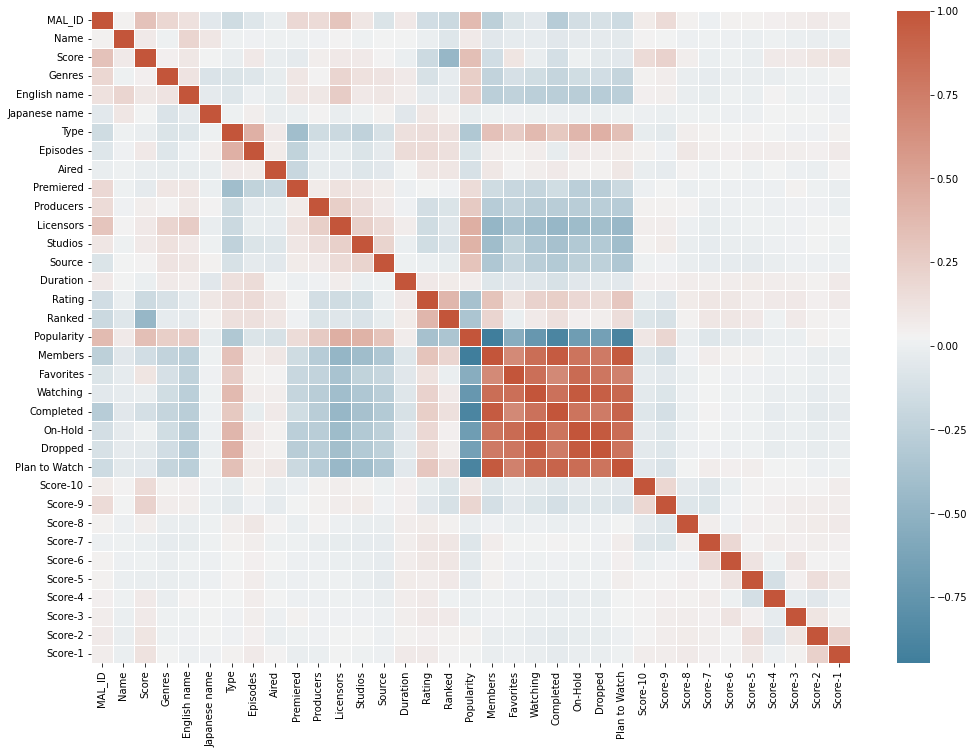

In [26]:
#plot corr matrix 
fig, ax = plt.subplots(figsize=(17,12))    

sns.heatmap(encoded_anime_df.corr(), linewidths=0.5, ax=ax,cmap=cmap)

In [46]:
#not plotting pairplot, it would be huge 35x35
#sns.pairplot(encoded_anime_df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc7afed48b0> (for post_execute):


KeyboardInterrupt: 

### Distribution

/tmp/ipykernel_852/254782536.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6,4))


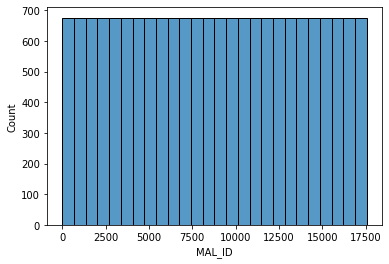

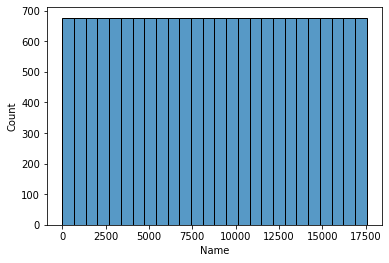

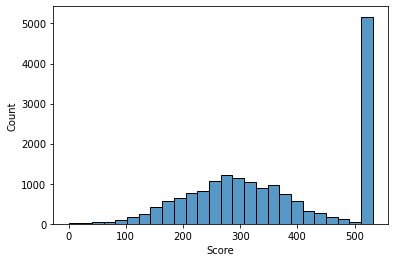

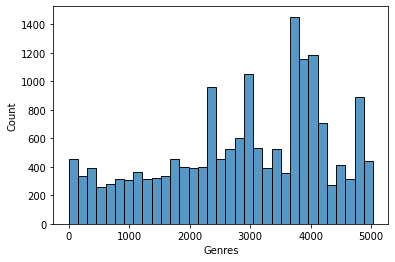

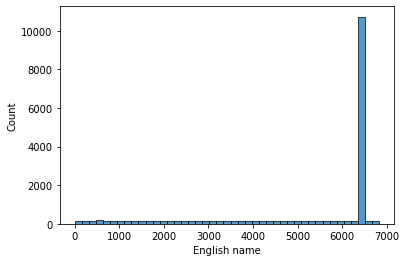

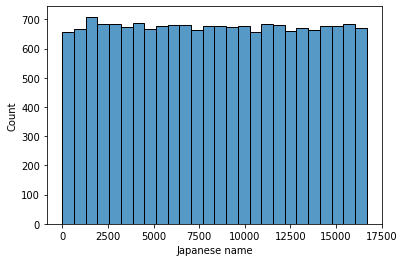

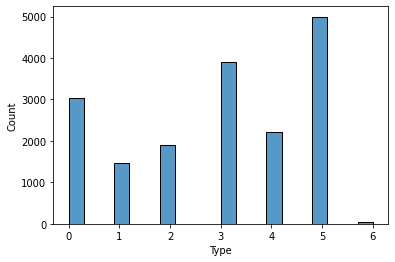

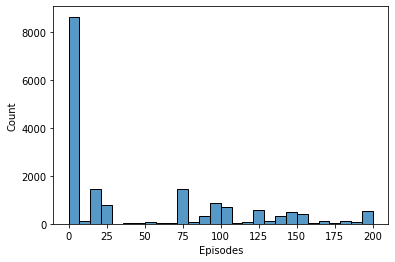

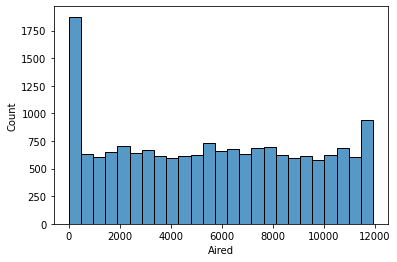

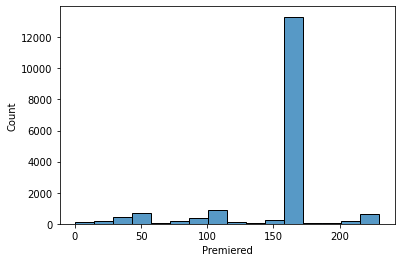

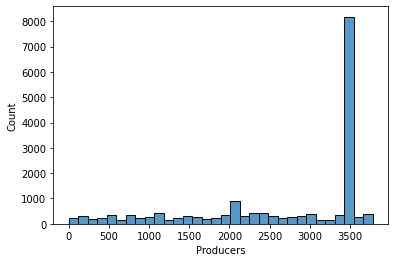

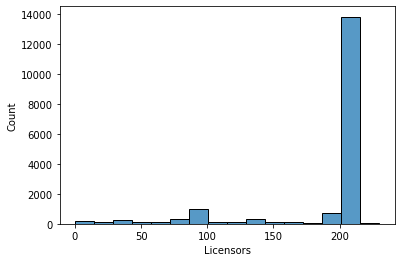

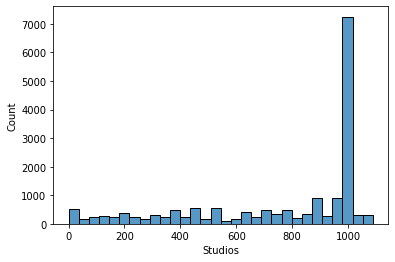

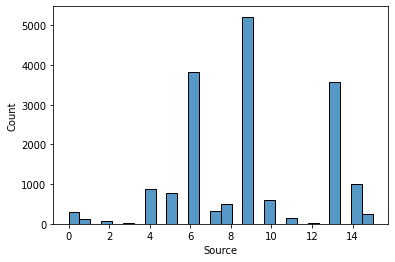

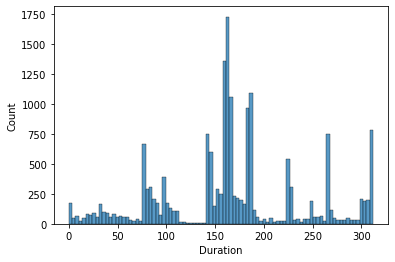

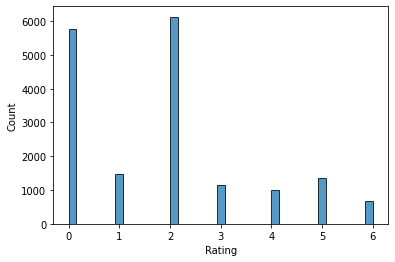

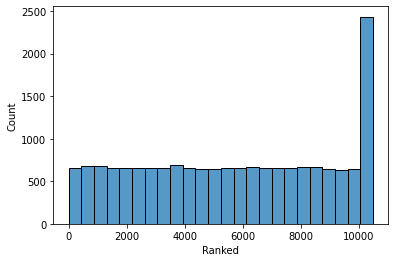

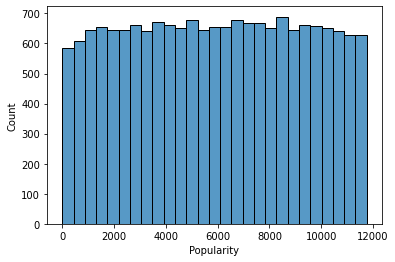

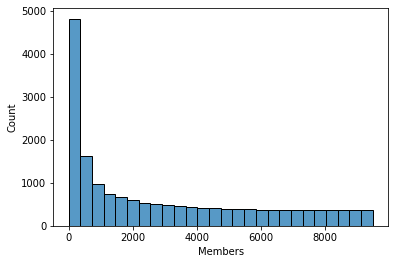

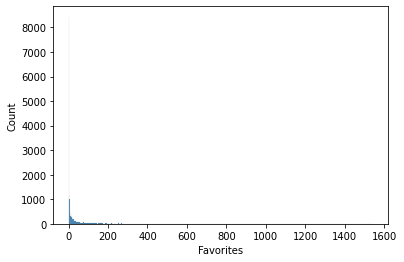

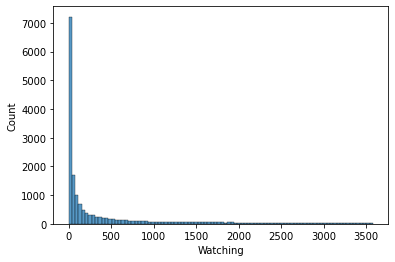

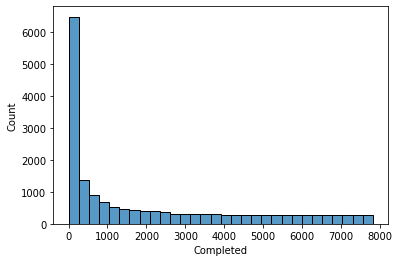

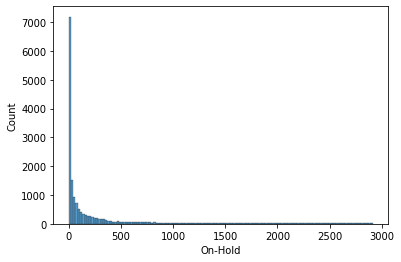

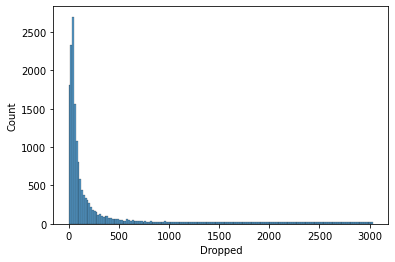

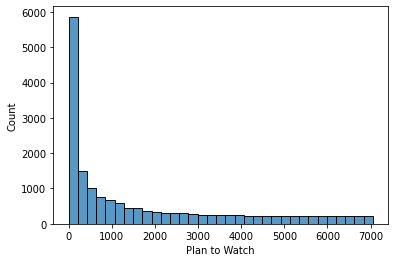

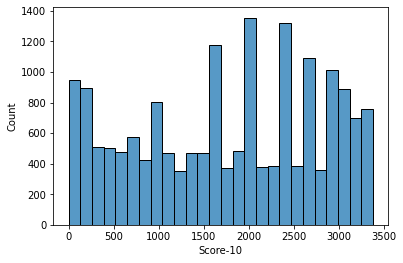

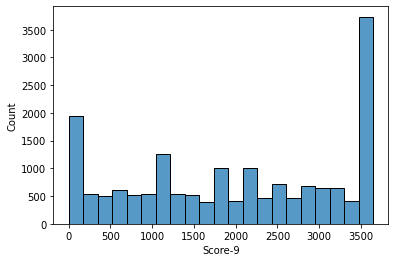

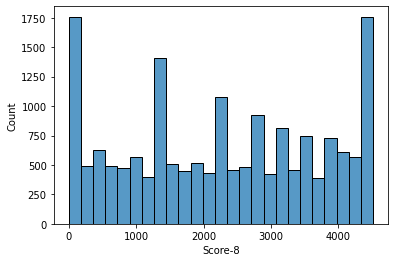

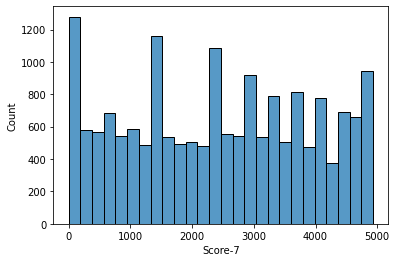

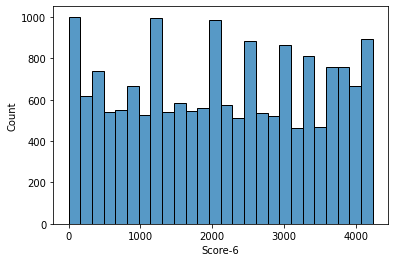

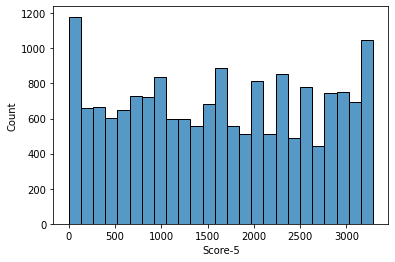

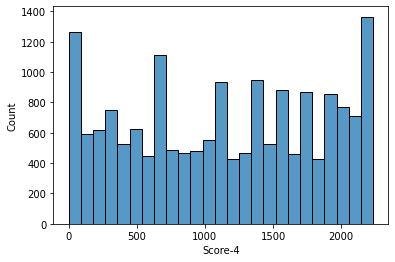

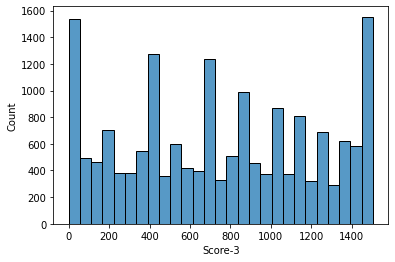

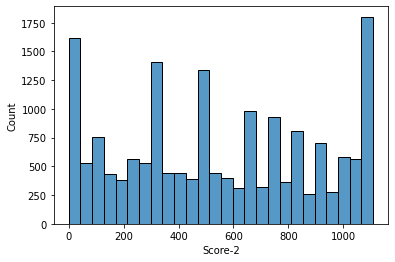

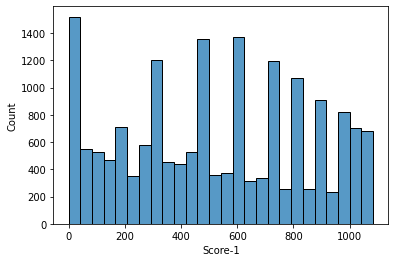

In [28]:
for i in encoded_anime_df.columns:
    fig, ax = plt.subplots(figsize=(6,4))    
    sns.histplot(encoded_anime_df[i])

### Count plots

In [35]:
for i in encoded_anime_df.columns:
    fig, ax = plt.subplots(figsize=(6,4))    
    sns.countplot(x = encoded_anime_df[i])

/home/ka_wagon/.pyenv/versions/3.8.6/envs/anime_map/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ka_wagon/.pyenv/versions/3.8.6/envs/anime_map/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ka_wagon/.pyenv/versions/3.8.6/envs/anime_map/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1046d179d0> (for post_execute):


KeyboardInterrupt: 

## anime_df_relevant_PG

In [53]:
anime_df_relevant_PG

,MAL_ID,Name,Genres,Studios
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Bones
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Madhouse
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",Sunrise
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",Toei Animation
...,...,...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen,Comedy,Unknown
11044,47402,Heikousen,"Music, Romance","10Gauge, Studio DURIAN"
11045,47614,Nu Wushen de Canzhuo Spring Festival Special,"Slice of Life, Comedy",Unknown
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube,"Mystery, Psychological, Supernatural, Thriller...",CloverWorks


In [54]:
#anime_df_relevant_PG = anime_df_relevant_PG.apply(lambda x: x.str.replace(',', ''))

AttributeError: Can only use .str accessor with string values!

In [58]:
#anime_df_relevant_PG.Genres = anime_df_relevant_PG.Genres.str.split(' ').str[0]

In [ ]:
#anime_df_relevant_PG.Genres.replace(',','', regex=True, inplace=True)


In [30]:
# Check if special char
#anime_df_relevant_PG.Name[11047].replace(' ','').isalpha()

False

In [59]:
anime_df_relevant_PG

,MAL_ID,Name,Genres,Studios
0,1,Cowboy Bebop,Action,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,Action,Bones
2,6,Trigun,Action,Madhouse
3,7,Witch Hunter Robin,Action,Sunrise
4,8,Bouken Ou Beet,Adventure,Toei Animation
...,...,...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen,Comedy,Unknown
11044,47402,Heikousen,Music,"10Gauge, Studio DURIAN"
11045,47614,Nu Wushen de Canzhuo Spring Festival Special,Slice,Unknown
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube,Mystery,CloverWorks


## users_anime_df_partial 

In [47]:
#visualize reduced users_anime_df

#reduce it
users_anime_partial = users_anime_df.sample(frac=0.001, random_state=42)

In [48]:
users_anime_partial.shape

(109225, 5)

### Correlation

<AxesSubplot:>

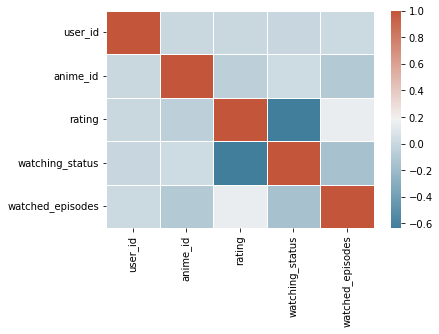

In [32]:
#plot corr matrix
fig, ax = plt.subplots(figsize=(6,4))      
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(users_anime_partial.corr(), linewidths=0.5, ax=ax,cmap=cmap)

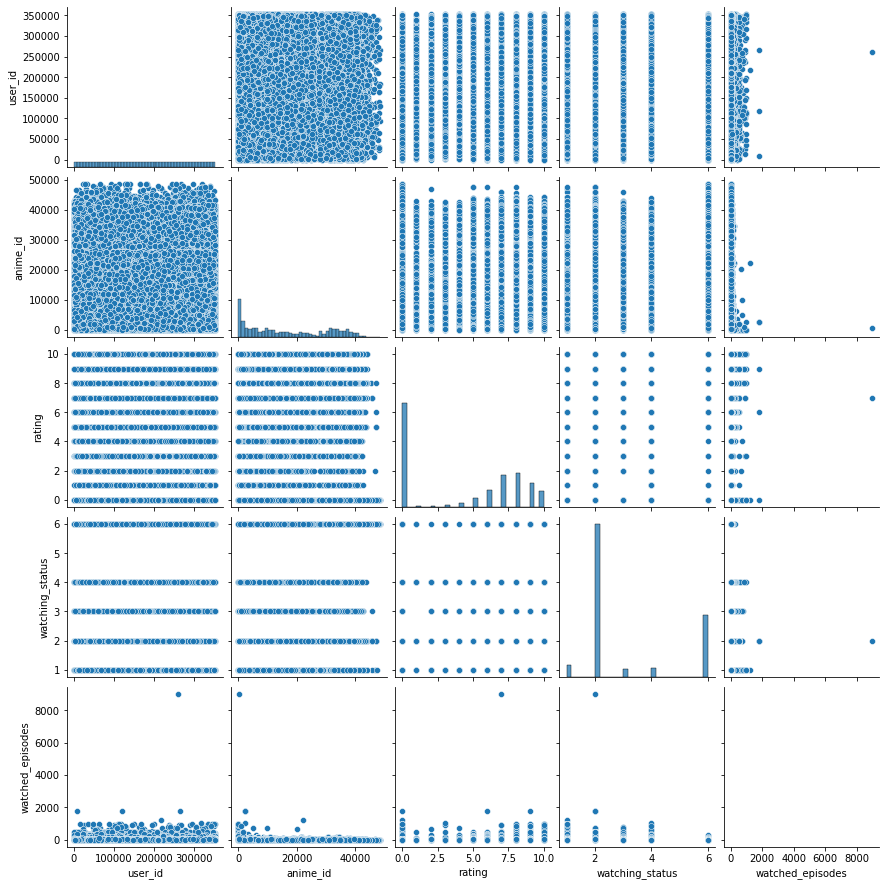

In [33]:
sns.pairplot(users_anime_partial)

KeyboardInterrupt: 

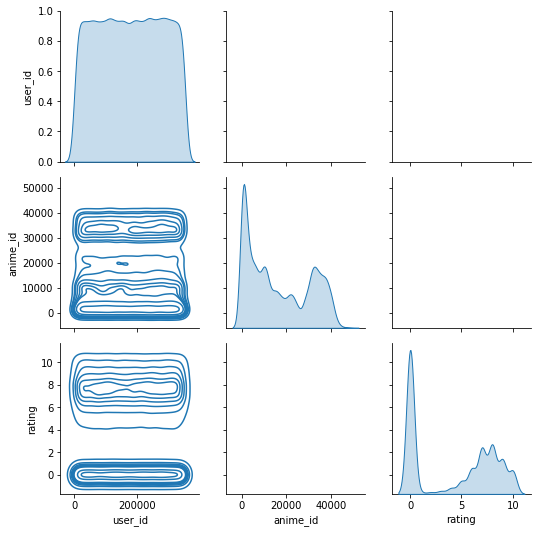

In [48]:
#takes too much resources to plot
#sns.pairplot(users_anime_partial_relevant, kind="kde")
#sns.pairplot(users_anime_partial_relevant, kind="hist")

### Distribution

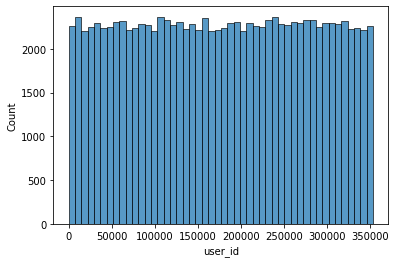

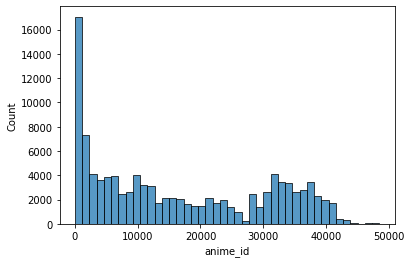

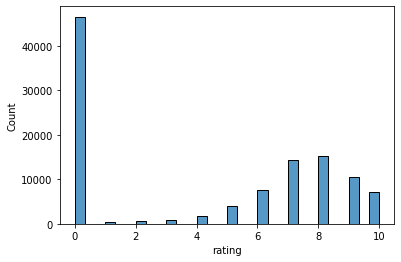

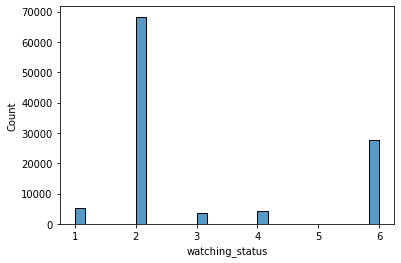

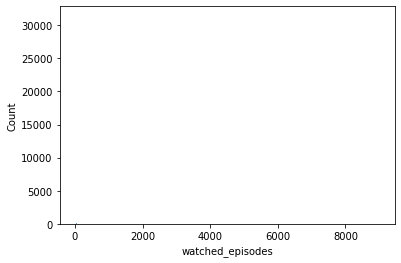

In [52]:
for i in users_anime_partial.columns:
    fig, ax = plt.subplots(figsize=(6,4))    
    sns.histplot(users_anime_partial[i],ax=ax)

In [58]:
users_anime_partial = users_anime_df.sample(frac=0.00001, random_state=42)

In [59]:
users_anime_partial.shape

(1092, 5)

,user_id,anime_id,rating,watching_status,watched_episodes
103975409,336145,2251,10,2,13
106163638,343247,2787,9,2,24
40226351,130592,235,9,1,752
11770069,38258,10572,0,3,1
60530240,196188,22729,8,2,12
...,...,...,...,...,...
15365082,49882,36456,10,2,25
105631094,341511,34403,0,4,3
31581477,102432,4224,10,2,25
3927630,12968,1168,10,2,10


In [20]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [21]:
#anime_df.Genres = anime_df.Genres.str.replace(',',' ')

In [22]:
#anime_df.Genres[0].split()[0]

'Action'

In [26]:
#anime_df.loc[anime_df.Genres == '', 'make'] = anime_df.Genres.str.split().str.get(0)

In [29]:
#anime_df.Genres = anime_df.Genres.str.split().str.get(0)

In [60]:
# too long
#sns.violinplot(x = 'user_id',y = 'rating', data = users_anime_partial)

In [ ]:
#sns.barplot(x="Genres", y="rating", data=tips)

ValueError: Could not interpret value `Genres` for parameter `x`

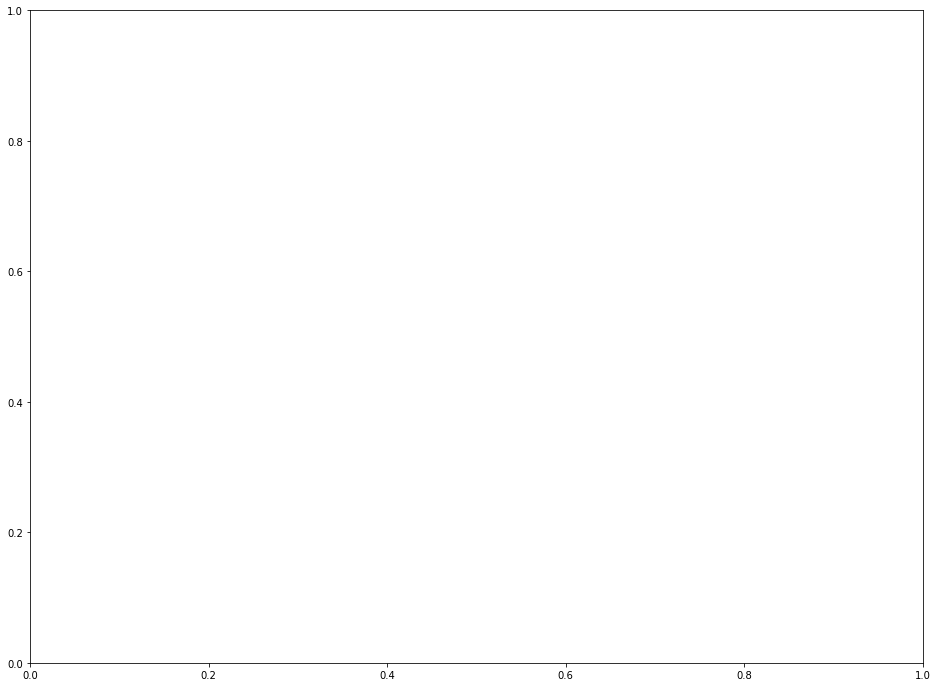

In [30]:
# fig = plt.subplots(figsize=(16,12))    
# sns.histplot(data=users_anime_partial, x="Genres", hue = 'rating',    multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5,
#     log_scale=True,
# )

### Count plots

In [ ]:
#sns.catplot(x='day', y='total_bill', data=tips_df)

In [ ]:
#sns.catplot(x='day', y='total_bill', data=tips_df, kind="box");


In [ ]:
#sns.regplot(x='total_bill', y='tip', data=tips_df)


# Visualization for audience

## N Most popular anime (ranking and completed and members)  bar chart on y axis

### Popular by ranking

In [435]:
full_df_sample.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes'],
      dtype='object')

In [436]:
full_df_sample.Ranked.replace(['Unknown'], -1,inplace = True)

In [437]:
full_df_sample.Ranked = full_df_sample.Ranked.apply(float)

In [438]:
full_df_sample.Ranked

0        28.0
1        28.0
2        28.0
3        28.0
4        28.0
         ... 
54607    -1.0
54608    -1.0
54609    -1.0
54610    -1.0
54611    -1.0
Name: Ranked, Length: 54612, dtype: float64

In [439]:
ranked = full_df_sample.sort_values(by='Ranked',ascending=True)

In [440]:
ranked = ranked[['Ranked','Name']]

In [441]:
ranked.Ranked=ranked.Ranked[ranked['Ranked']!=-1]

In [442]:
ranked.dropna(inplace=True)

In [443]:
ranked.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Ranked', ylabel='Name'>

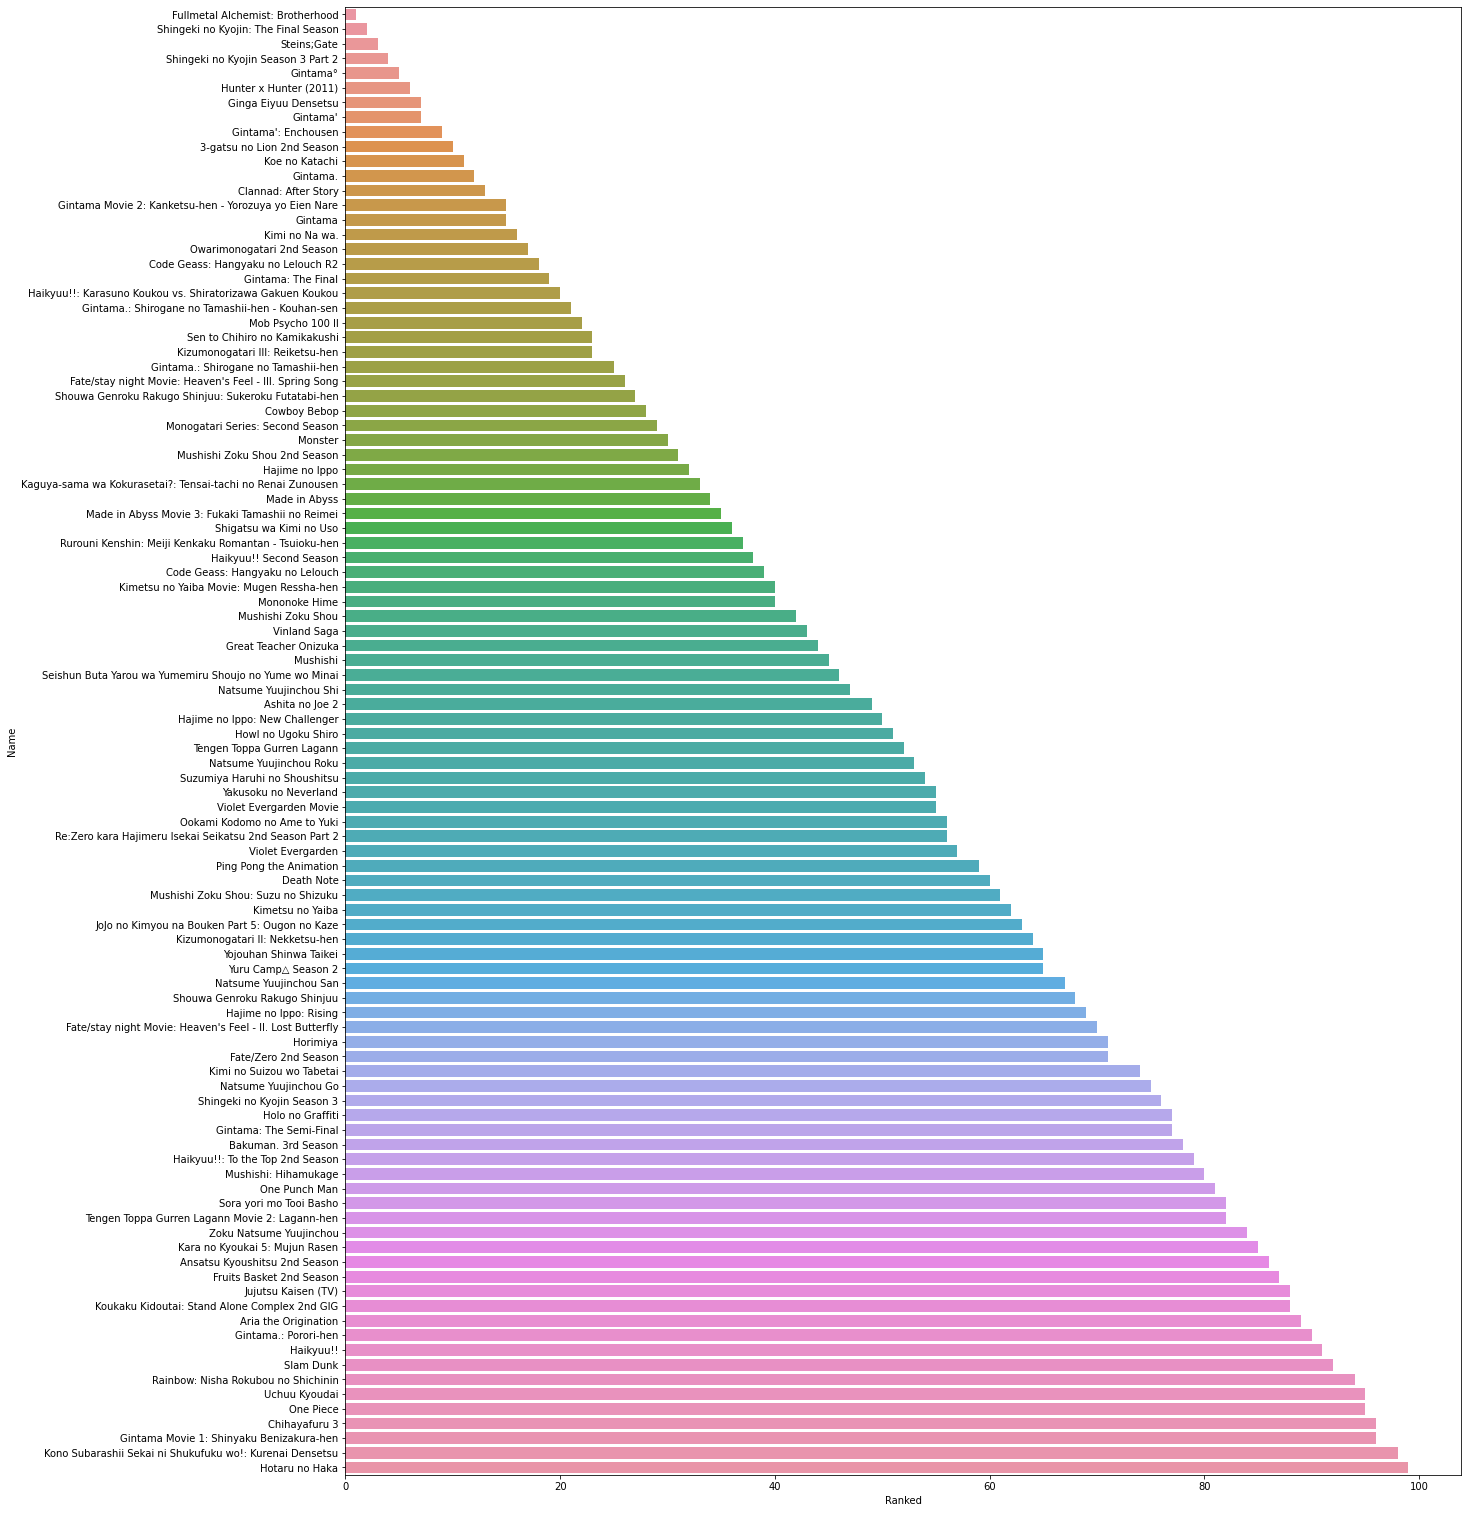

In [444]:
fig, ax = plt.subplots(figsize=(20,27))
sns.barplot(data=ranked.iloc[:100], y = 'Name',x='Ranked',ax=ax)

### Popular by completed


In [445]:
completed = full_df_sample.sort_values(by='Completed',ascending=False)

In [446]:
completed = completed[['Completed','Name']]

In [447]:
completed.dropna(inplace=True)

In [448]:
completed.drop_duplicates(inplace=True)

In [449]:
completed

,Completed,Name
30764,2182587,Shingeki no Kyojin
9492,2146116,Death Note
26502,1907261,Sword Art Online
40242,1841220,One Punch Man
42821,1655900,Boku no Hero Academia
...,...,...
54337,0,Honzuki no Gekokujou: Shisho ni Naru Tame ni w...
54335,0,Shakunetsu Kabaddi
54325,0,Meikyuu Black Company
54323,0,Cyberpunk: Edgerunners


### Popular by members

In [450]:
members = full_df_sample.sort_values(by='Members',ascending=False)
members = members[['Members','Name']]
members.dropna(inplace=True)
members.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Members', ylabel='Name'>

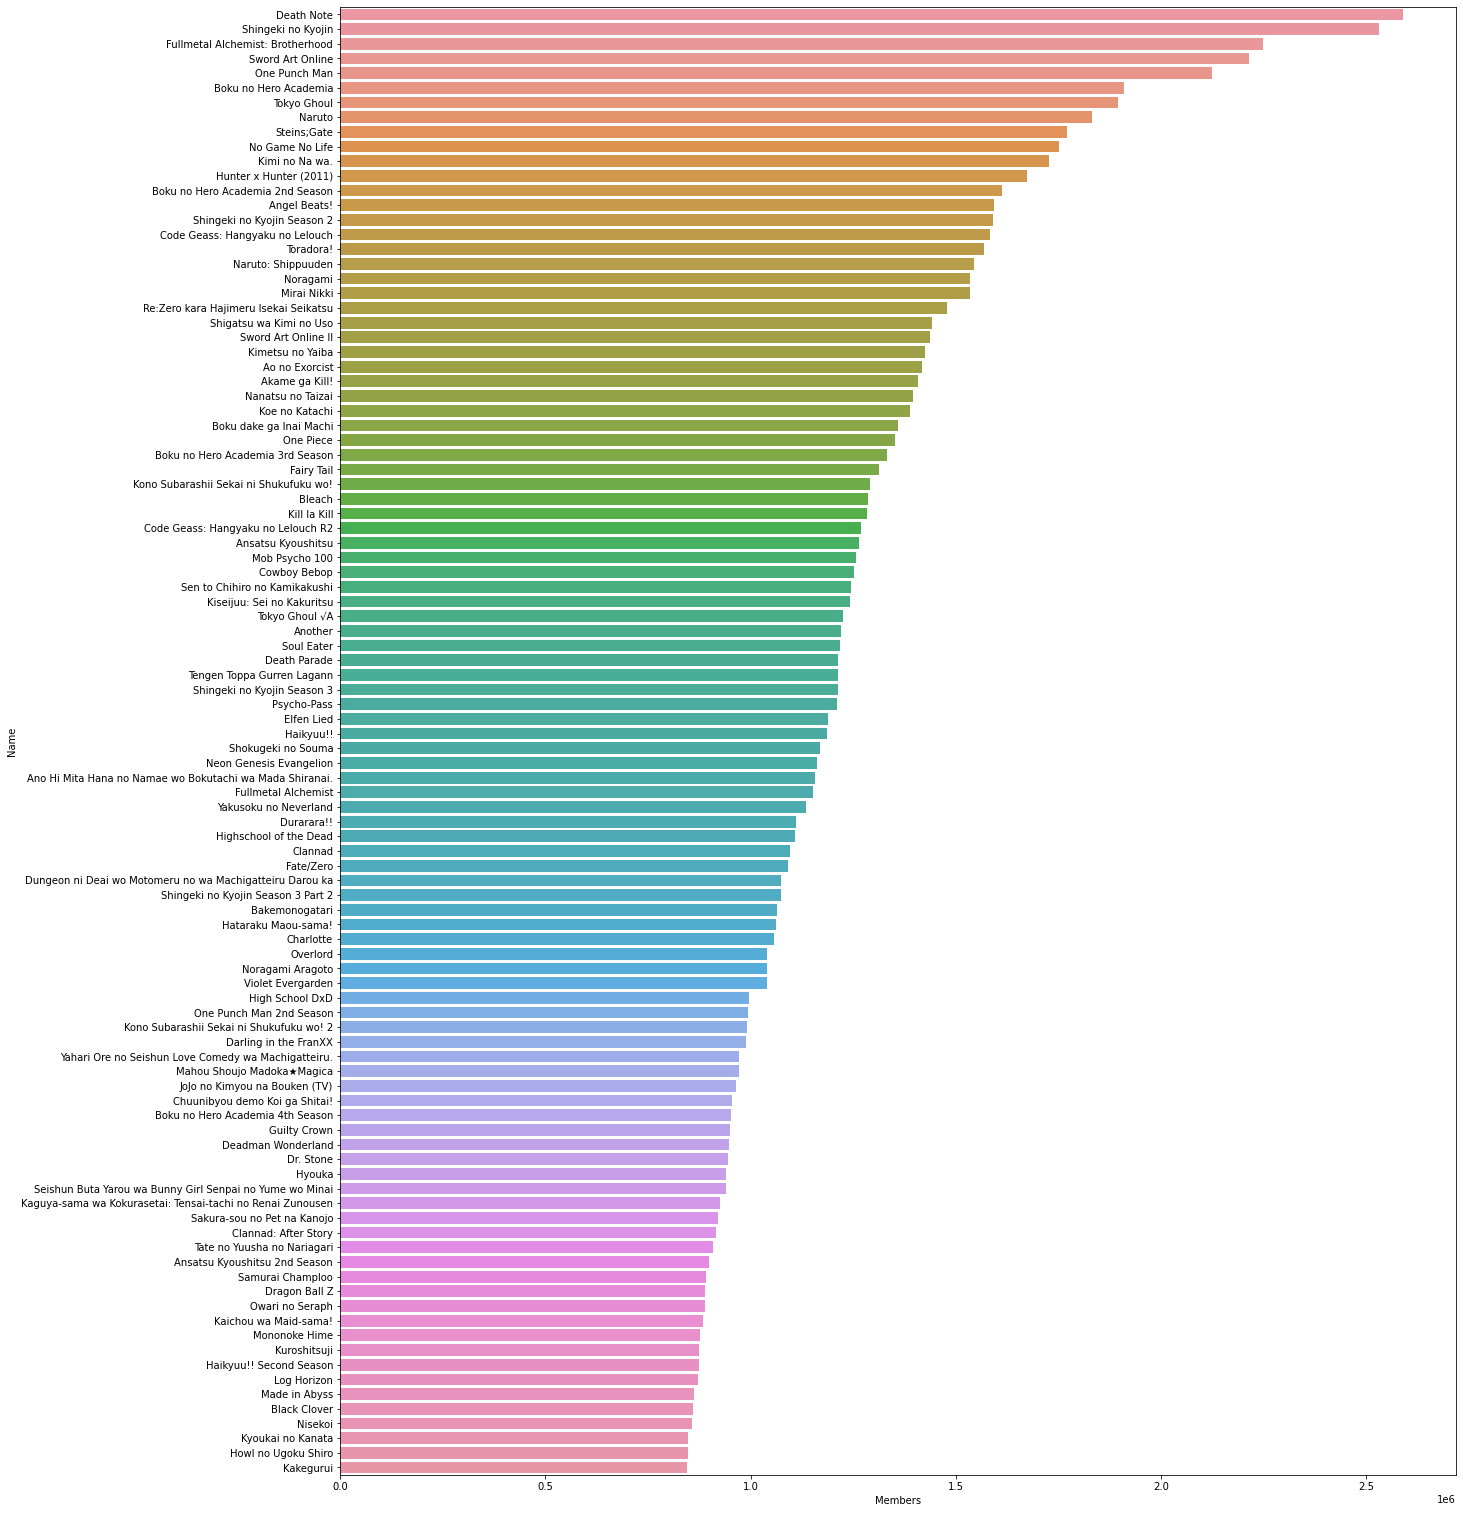

In [451]:
fig, ax = plt.subplots(figsize=(20,27))
sns.barplot(data=members.iloc[:100], y = 'Name',x='Members',ax=ax)

## N Most popular anime (user count )  bar chart on y axis -----> Tanguy made it

In [452]:
# FIND IT IN NOTEBOOK OF DIMITRI 

## Most popular Genres - tags diagram

In [453]:
full_df_sample.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes'],
      dtype='object')

In [454]:
genres = pd.concat([full_df_sample.drop(columns =['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'user_id',
       'rating', 'watching_status', 'watched_episodes']), full_df_sample['Genres'].str.get_dummies(sep=", ")], 1)

/tmp/ipykernel_7233/303512086.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  genres = pd.concat([full_df_sample.drop(columns =['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',


In [455]:
genres.head(2)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [456]:
popular_genres = genres.apply(np.sum).sort_values(ascending=False)

In [457]:
popular_genres = popular_genres.to_frame()

In [458]:
popular_genres.reset_index(inplace = True)

In [459]:
popular_genres['index'].to_list()

['Comedy',
 'Action',
 'Romance',
 'Drama',
 'Fantasy',
 'School',
 'Shounen',
 'Supernatural',
 'Adventure',
 'Sci-Fi',
 'Slice of Life',
 'Mystery',
 'Ecchi',
 'Magic',
 'Seinen',
 'Super Power',
 'Harem',
 'Psychological',
 'Mecha',
 'Military',
 'Historical',
 'Horror',
 'Shoujo',
 'Demons',
 'Parody',
 'Thriller',
 'Sports',
 'Game',
 'Music',
 'Martial Arts',
 'Vampire',
 'Space',
 'Police',
 'Hentai',
 'Samurai',
 'Kids',
 'Dementia',
 'Josei',
 'Shoujo Ai',
 'Shounen Ai',
 'Cars',
 'Yaoi',
 'Yuri',
 'Unknown']

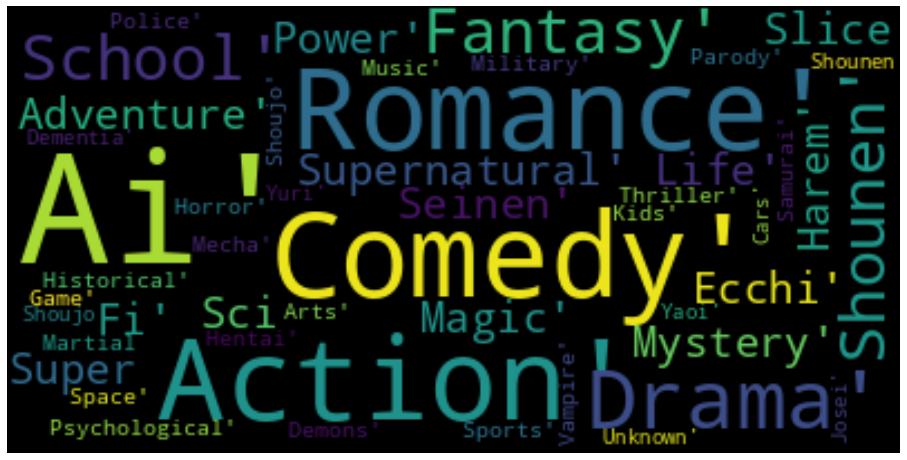

In [460]:
# Start with one review:
text = str(popular_genres['index'].to_list())

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(16, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most popular Studios -pie 

In [461]:
studios = full_df_sample.Studios.value_counts().to_frame().reset_index()

In [462]:
studios = studios.rename(columns={'index':'Studios', 'Studios':'count'})

In [463]:
studios[studios.Studios == 'Unknown']

,Studios,count
7,Unknown,1708


In [464]:
studios.drop([7],inplace=True)

In [465]:
top_50_studios = studios.iloc[:50]

In [466]:
sample_studios = studios.sample(30).sort_values(by='count',ascending=False)

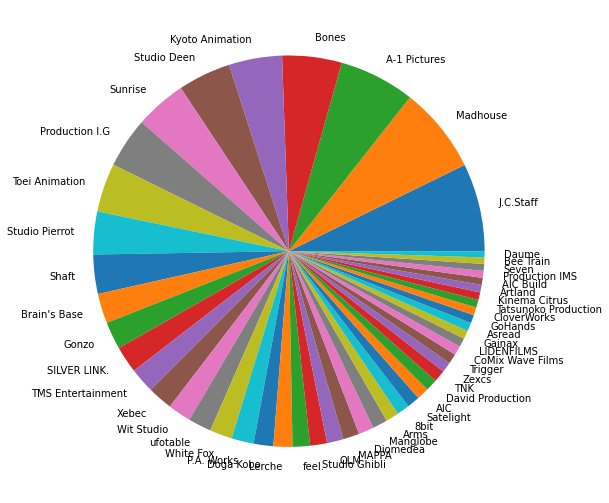

In [467]:
# Creating plot
fig = plt.figure(figsize =(14, 9))
#plt.pie(sample_studios['count'], labels = sample_studios['Studios'])
#plt.pie(studios['count'], labels = studios['Studios'])

plt.pie(top_50_studios['count'], labels = top_50_studios['Studios'])

# show plot
plt.show()

## Sources of anime: movie, OTA, TV - pie

In [468]:
source = full_df_sample.Source.value_counts().to_frame().reset_index()

In [469]:
source = source.rename(columns={'index':'Source', 'Source':'count'})

In [470]:
source[source.Source == 'Unknown']

,Source,count
8,Unknown,1064


In [471]:
source.index[source['Source']=='Unknown'].tolist()[0]

8

In [472]:
source.drop([source.index[source['Source']=='Unknown'].tolist()[0]],inplace=True)

In [473]:
source

,Source,count
0,Manga,22849
1,Light novel,10025
2,Original,9803
3,Visual novel,3267
4,Game,1917
5,4-koma manga,1650
6,Novel,1580
7,Web manga,1297
9,Other,719
10,Music,170


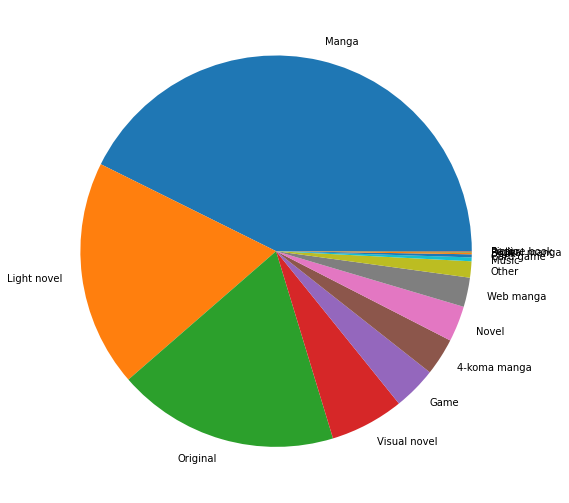

In [474]:
# Creating plot
fig = plt.figure(figsize =(14, 9))
#plt.pie(sample_studios['count'], labels = sample_studios['Studios'])
#plt.pie(studios['count'], labels = studios['Studios'])

plt.pie(source['count'], labels = source['Source'])

# show plot
plt.show()

## Community per anime 

## Count of animes accoding to PG rating

## How many anime each Studio produces

## What are the most popular anime according to watching or score or rank

## How many anime made per year 

## How many anime watched through years

## Anime duration

## Popularity  with duration (rank(?) vs duration?)

## Dropped anime 

## Top anime by number of episodes

## Merge_df

In [67]:
merged_df

,anime_id,Name,Genres,Studios,user_id,rating
0,1,Cowboy Bebop,Action,Sunrise,11550.0,8.0
1,5,Cowboy Bebop: Tengoku no Tobira,Action,Bones,298511.0,6.0
2,6,Trigun,Action,Madhouse,289146.0,10.0
3,7,Witch Hunter Robin,Action,Sunrise,NaN,NaN
4,8,Bouken Ou Beet,Adventure,Toei Animation,NaN,NaN
...,...,...,...,...,...,...
11243,47398,Kimetsu Gakuen: Valentine-hen,Comedy,Unknown,NaN,NaN
11244,47402,Heikousen,Music,"10Gauge, Studio DURIAN",NaN,NaN
11245,47614,Nu Wushen de Canzhuo Spring Festival Special,Slice,Unknown,NaN,NaN
11246,47616,Yakusoku no Neverland 2nd Season: Michishirube,Mystery,CloverWorks,NaN,NaN


# Drop duplicates 

In [121]:
anime_df.duplicated().sum()

0

In [122]:
users_anime_df.duplicated().sum()

1

# Remove columns  in anime_df 

In [8]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [14]:
# First intent:
# drop columns (and do that earlier): ['Premiered', 'Producers', 'Licensors', 'Ranked', 'Popularity', 'Members']
# keep: ['Source', 'Rating']

# analyze after: ['Studios', "Sources"]

In [15]:
# second intent: only keep a few columns

In [16]:
anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [19]:
anime_df.Type.value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [20]:
anime_df.Aired.value_counts()

Unknown                         309
2005                             57
2004                             49
2021 to ?                        46
2003                             46
                               ... 
Dec 18, 2009 to Jul 26, 2010      1
Dec 26, 2009                      1
Apr 5, 1993 to Jan 27, 1994       1
Jan 25, 1992                      1
Mar 17, 2021 to ?                 1
Name: Aired, Length: 11947, dtype: int64

In [21]:
anime_df.Source.value_counts()

Original         5215
Manga            3825
Unknown          3567
Visual novel      993
Game              880
Light novel       768
Other             597
Novel             510
Music             317
4-koma manga      288
Web manga         252
Picture book      147
Book              112
Card game          64
Digital manga      15
Radio              12
Name: Source, dtype: int64

In [22]:
anime_df.Rating.value_counts()

PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
Rx - Hentai                       1345
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: Rating, dtype: int64

In [ ]:
# keep ['MAL_ID', 'Name', 'Genres', 'Types', 'Aired', 'Studios', 'Duration', 'Rating']

In [67]:
anime_df_relevant = anime_df[['MAL_ID', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source', 'Duration', 'Rating']]

In [70]:
anime_df_relevant

,MAL_ID,Name,Genres,Type,Aired,Studios,Source,Duration,Rating
0,0,2579,31,5,1088,876,9,162,3
1,1,2581,799,0,11268,142,9,65,3
2,2,15801,1428,5,189,464,6,162,2
3,3,16611,1345,5,5806,876,9,166,2
4,4,1713,2108,5,11801,967,6,158,1
...,...,...,...,...,...,...,...,...,...
17557,17557,2826,2238,2,1350,1009,8,312,6
17558,17558,9703,2681,5,146,596,6,312,6
17559,17559,5659,4258,5,6727,1009,14,312,3
17560,17560,16847,2273,5,11946,5,6,312,2


In [69]:
anime_df_relevant.columns

Index(['MAL_ID', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source',
       'Duration', 'Rating'],
      dtype='object')

# Remove R18 content in anime_df


In [68]:
# adding _PG to the new df name for "PG_rating"
anime_df_relevant_PG = anime_df_relevant[~anime_df_relevant.Genres.str.contains("Hentai")]

AttributeError: Can only use .str accessor with string values!

In [46]:
anime_df_relevant_PG = anime_df_relevant_PG[~anime_df_relevant_PG.Genres.str.contains("Yuri")]

In [47]:
anime_df_relevant_PG = anime_df_relevant_PG[~anime_df_relevant_PG.Genres.str.contains("Yaoi")]

In [50]:
anime_df_relevant_PG['Studios'].value_counts()

Unknown                                   6157
Toei Animation                             755
Sunrise                                    479
J.C.Staff                                  350
Madhouse                                   323
                                          ... 
Takahashi Studio, Suna Kouhou                1
Sunrise, Bandai Visual                       1
Production I.G, Welz Animation Studios       1
Studio Pierrot, David Production             1
Studio Kafka                                 1
Name: Studios, Length: 1036, dtype: int64

In [48]:
anime_df_relevant_PG['Studios'].nunique()

1036

In [49]:
anime_df_relevant_PG['Source'].unique()

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Unknown', 'Other', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Card game',
       'Digital manga'], dtype=object)

In [107]:
anime_df_relevant_PG['Source'].value_counts()

Original         5085
Manga            3499
Unknown          3318
Game              869
Light novel       747
Other             590
Novel             505
Visual novel      372
Music             317
4-koma manga      288
Web manga         249
Picture book      147
Book              111
Card game          64
Radio              12
Digital manga      10
Name: Source, dtype: int64

In [51]:
anime_df_relevant_PG['Duration'].value_counts()

24 min. per ep.          1712
23 min. per ep.          1058
25 min. per ep.           826
2 min.                    744
Unknown                   549
                         ... 
27 sec.                     1
1 hr. 24 min. per ep.       1
10 sec. per ep.             1
3 sec.                      1
55 sec. per ep.             1
Name: Duration, Length: 313, dtype: int64

In [52]:
anime_df_relevant_PG['Rating'].value_counts()

PG-13 - Teens 13 or older         6130
G - All Ages                      5782
PG - Children                     1461
R - 17+ (violence & profanity)    1156
R+ - Mild Nudity                   968
Unknown                            686
Name: Rating, dtype: int64

In [ ]:
# re-checking if hentai removal worked

In [53]:
anime_df_relevant_PG.Genres.str.contains("Hentai").value_counts()

False    16183
Name: Genres, dtype: int64

In [54]:
anime_df_relevant_PG.Genres.str.contains("Yuri").value_counts()

False    16183
Name: Genres, dtype: int64

In [55]:
anime_df_relevant_PG.Genres.str.contains("Yaoi").value_counts()

False    16183
Name: Genres, dtype: int64

In [32]:
# compare shapes

In [56]:
anime_df.shape

(17562, 35)

In [57]:
anime_df_relevant_PG.shape

(16183, 9)

# Check the missing values (Unknown, ...)

In [123]:
anime_df_relevant_PG[anime_df_relevant_PG.Studios.str.contains("Unknown")]

,anime_id,Name,Genres,Type,Aired,Studios,Source,Duration,Rating
192,215,Pia Carrot e Youkoso!! 2 DX,"Comedy, Romance",OVA,"Dec 18, 1999 to Oct 25, 2000",Unknown,Visual novel,28 min. per ep.,PG-13 - Teens 13 or older
288,312,Ace wo Nerae!: Final Stage,"Action, Drama, Sports",OVA,"Oct 25, 1989 to Apr 25, 1990",Unknown,Unknown,24 min. per ep.,PG-13 - Teens 13 or older
337,361,Memories Off,"Romance, Drama",OVA,"Nov 21, 2001 to Mar 6, 2002",Unknown,Visual novel,30 min. per ep.,PG-13 - Teens 13 or older
338,362,Memories Off 2nd,"Romance, Drama",OVA,"Jan 22, 2003 to May 21, 2003",Unknown,Visual novel,30 min. per ep.,PG-13 - Teens 13 or older
391,418,Ranma ½: Chuugoku Nekonron Daikessen! Okite Ya...,"Adventure, Comedy, Shounen",Movie,"Nov 2, 1991",Unknown,Manga,1 hr. 14 min.,PG-13 - Teens 13 or older
...,...,...,...,...,...,...,...,...,...
17550,48441,Eiyuu Densetsu: Sen no Kiseki,Action,TV,2022 to ?,Unknown,Game,Unknown,Unknown
17551,48442,Shikaru Neko,Slice of Life,TV,"Apr, 2021 to ?",Unknown,Manga,Unknown,Unknown
17556,48480,Wan Jie Shen Zhu 3rd Season,"Adventure, Fantasy",ONA,"Mar 17, 2021 to ?",Unknown,Manga,9 min. per ep.,Unknown
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural",ONA,"Apr 4, 2021 to ?",Unknown,Novel,Unknown,Unknown


In [139]:
anime_df_relevant_PG['Studios'].explode().unique()

array(['Sunrise', 'Bones', 'Madhouse', ...,
       'Fanworks, Space Neko Company', 'OZ', 'Studio Kafka'], dtype=object)

In [141]:
anime_df_relevant_PG.columns

Index(['anime_id', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source',
       'Duration', 'Rating'],
      dtype='object')

In [144]:
anime_df_relevant_PG['Genres'].value_counts()

Music                                                                                                                            790
Comedy                                                                                                                           668
Kids                                                                                                                             413
Kids, Music                                                                                                                      234
Dementia                                                                                                                         228
Slice of Life                                                                                                                    217
Music, Kids                                                                                                                      201
Slice of Life, Comedy                                                

In [142]:
anime_df_relevant_PG['Genres'].explode().value_counts()

Music                                                                                                                            790
Comedy                                                                                                                           668
Kids                                                                                                                             413
Kids, Music                                                                                                                      234
Dementia                                                                                                                         228
Slice of Life                                                                                                                    217
Music, Kids                                                                                                                      201
Slice of Life, Comedy                                                

In [ ]:
anime_df_relevant_PG['Type'].explode().value_counts()

In [ ]:
anime_df_relevant_PG['Duration'].explode().value_counts()

In [138]:
anime_df_relevant_PG['Studios'].explode().value_counts()

Unknown                                                                             6157
Toei Animation                                                                       755
Sunrise                                                                              479
J.C.Staff                                                                            350
Madhouse                                                                             323
TMS Entertainment                                                                    277
Production I.G                                                                       265
Studio Deen                                                                          262
Studio Pierrot                                                                       249
OLM                                                                                  212
Nippon Animation                                                                     208
A-1 Pictures         

In [ ]:
anime_df_relevant_PG['Rating'].explode().value_counts()

In [136]:
print(anime_df_relevant_PG.apply(lambda col: col.unique()))

anime_id    [1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22...
Name        [Cowboy Bebop, Cowboy Bebop: Tengoku no Tobira...
Genres      [Action, Adventure, Comedy, Drama, Sci-Fi, Spa...
Type           [TV, Movie, OVA, Special, ONA, Music, Unknown]
Aired       [Apr 3, 1998 to Apr 24, 1999, Sep 1, 2001, Apr...
Studios     [Sunrise, Bones, Madhouse, Toei Animation, Gal...
Source      [Original, Manga, Light novel, Game, Visual no...
Duration    [24 min. per ep., 1 hr. 55 min., 25 min. per e...
Rating      [R - 17+ (violence & profanity), PG-13 - Teens...
dtype: object


In [133]:
for col in anime_df_relevant_PG:
    print(anime_df_relevant_PG['Studios'].unique())

['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']


# Remove columns  in users_anime_df

In [70]:
users_anime_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [71]:
# keep ['user_id', 'anime_id', 'rating']
# TODO : do it on all the df later, only on partial in next part at first

# Merge DFs

In [60]:
anime_df_relevant_PG

,MAL_ID,Name,Genres,Studios
0,1,Cowboy Bebop,Action,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,Action,Bones
2,6,Trigun,Action,Madhouse
3,7,Witch Hunter Robin,Action,Sunrise
4,8,Bouken Ou Beet,Adventure,Toei Animation
...,...,...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen,Comedy,Unknown
11044,47402,Heikousen,Music,"10Gauge, Studio DURIAN"
11045,47614,Nu Wushen de Canzhuo Spring Festival Special,Slice,Unknown
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube,Mystery,CloverWorks


In [61]:
# rename MAL_ID in anime.csv to anime_id
anime_df_relevant_PG.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)

In [62]:
# (optional, exploration) split cleaned_df before merge
users_anime_partial = users_anime_df.sample(frac=0.00001, random_state=42)

users_anime_partial_relevant = users_anime_partial[['user_id', 'anime_id', 'rating']]

In [75]:
users_anime_partial_relevant.head()

,user_id,anime_id,rating
103975409,336145,2251,10
106163638,343247,2787,9
40226351,130592,235,9
11770069,38258,10572,0
60530240,196188,22729,8


In [73]:
users_anime_partial_relevant.shape

(10922, 3)

In [74]:
users_anime_partial_relevant.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [63]:
# fuse anime.csv and animelist.csv
# merged_df = anime_no_H_df.merge(animelist_df, on="anime_id", how='left')
merged_df = anime_df_relevant_PG.merge(users_anime_partial_relevant, on="anime_id", how='left')

In [64]:
merged_df.shape

(11248, 6)

In [65]:
merged_df.columns

Index(['anime_id', 'Name', 'Genres', 'Studios', 'user_id', 'rating'], dtype='object')

In [91]:
# checking on one user the data stored (animes)
merged_df.query("user_id== 1")

,anime_id,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,user_id,rating,watching_status,watched_episodes
899107,9919,Ao no Exorcist,7.59,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,"Apr 17, 2011 to Oct 2, 2011",Spring 2011,"Aniplex, Dentsu, Mainichi Broadcasting System,...",Aniplex of America,...,99008.0,40731.0,13431.0,4567.0,1786.0,1448.0,1.0,8.0,2.0,25.0


In [92]:
# check that there isn't any anime ID (/ MAL_id with hentai genre left)
merged_df.Genres.str.contains("Hentai").value_counts()

False    2144315
Name: Genres, dtype: int64

In [94]:
merged_df.Genres.str.contains("Yuri").value_counts()

False    2144315
Name: Genres, dtype: int64

In [95]:
merged_df.Genres.str.contains("Yaoi").value_counts()

False    2144315
Name: Genres, dtype: int64

# reduce dimensionality of feature matrix (recommender system / movie from course)


In [100]:
pd.set_option("display.max_columns", None)

In [68]:
merged_df.head()

,anime_id,Name,Genres,Studios,user_id,rating
0,1,Cowboy Bebop,Action,Sunrise,11550.0,8.0
1,5,Cowboy Bebop: Tengoku no Tobira,Action,Bones,298511.0,6.0
2,6,Trigun,Action,Madhouse,289146.0,10.0
3,7,Witch Hunter Robin,Action,Sunrise,NaN,NaN
4,8,Bouken Ou Beet,Adventure,Toei Animation,NaN,NaN


In [96]:
# remove commas from genres

In [ ]:
# pick 3rd word in Aired column (starting year)

In [ ]:
# Duration: transform everything into minutes duration
# Duration: Encode in small sub-categories : "less than 10mn" / "between 10 and 30" / "between 30 and 60mn" / "more than 60mn"
# Duration: re-evaluate duration encode and change if necessary

In [ ]:
# for all columns, OHE + drop unknown column

In [ ]:
## Second thought dataset shape : ['anime_id', 'Genres', 'Studios?']  (from anime_no_H_df) + user data (from animelist_df_partial)

In [ ]:
# personal work /analysis on the cleaned dataset
# produce visualization and draw conclusions / thoughts about what the visualizations are showing
# discuss it together
